In [147]:
import pandas as pd
import numpy as nd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [148]:
df=pd.read_csv("titanic.csv",sep='\t')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [150]:
df=df.drop("PassengerId",axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          30
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       125
Embarked      1
dtype: int64

In [152]:
df=df.dropna()

In [153]:
df.isnull().sum()/len(df)*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
dtype: float64

In [154]:
df["Ticket"].value_counts()

113803         2
35281          2
19950          2
248698         1
113776         1
36973          1
PC 17572       1
PC 17558       1
110465         1
C.A. 29395     1
PC 17759       1
113509         1
PC 17593       1
W.E.P. 5734    1
113788         1
PC 17599       1
113783         1
11752          1
17463          1
PP 9549        1
PC 17754       1
348123         1
230080         1
27267          1
Name: Ticket, dtype: int64

In [155]:
df=df.drop("Name",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
6,0,1,male,54.0,0,0,17463,51.8625,E46,S
10,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,female,58.0,0,0,113783,26.5500,C103,S


In [156]:
df=df.drop("Ticket",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [157]:
df=df.drop("Cabin",axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

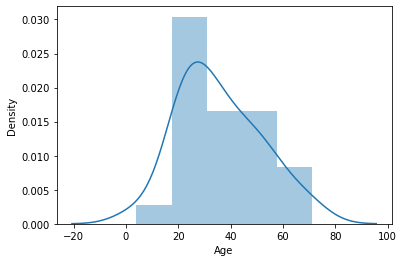

In [158]:
sns.distplot(df["Age"])

In [159]:
df["Age"]=df["Age"].fillna(28)

In [160]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.481481,1.296296,35.666667,0.518519,0.518519,70.807252
std,0.509175,0.608581,15.898113,0.848998,0.752962,71.461869
min,0.000000,1.000000,4.000000,0.000000,0.000000,7.650000
25%,0.000000,1.000000,23.500000,0.000000,0.000000,26.416650
50%,0.000000,1.000000,34.000000,0.000000,0.000000,53.100000
75%,1.000000,1.000000,46.500000,1.000000,1.000000,77.008350
max,1.000000,3.000000,71.000000,3.000000,2.000000,263.000000


In [161]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [162]:
df["Parch"].value_counts()

0    17
1     6
2     4
Name: Parch, dtype: int64

In [163]:
#converting datatypes from int to category on required col
df["Survived"]=df["Survived"].astype("category")
df["Pclass"]=df["Pclass"].astype("category")
df["SibSp"]=df["SibSp"].astype("category")
df["Parch"]=df["Parch"].astype("category")

In [164]:
#creating dataframe on numerical and categorical data
df_num=df.select_dtypes(include="float64")
df_cat=df.select_dtypes(exclude="float64")

In [165]:
df_num.head()

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500


In [166]:
df_cat.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
1,1,1,female,1,0,C
3,1,1,female,1,0,S
6,0,1,male,0,0,S
10,1,3,female,1,1,S
11,1,1,female,0,0,S


In [167]:
ms=MinMaxScaler()
df_num_sc=ms.fit_transform(df_num)

In [168]:
df_num_df=pd.DataFrame(df_num_sc,index=df_num.index,columns=df_num.columns)

In [169]:
df_num_df.head()

,Age,Fare
1,0.507463,0.249200
3,0.462687,0.177991
6,0.746269,0.173145
10,0.000000,0.035442
11,0.805970,0.074016


In [170]:
df_cat_dum=pd.get_dummies(df_cat)

In [171]:
df_cat_dum.head()

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_3,Parch_0,Parch_1,Parch_2,Embarked_C,Embarked_S
1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
6,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1
10,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1
11,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1


In [172]:
df_final=pd.concat([df_num_df,df_cat_dum],axis=1)
df_final.head()

,Age,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_3,Parch_0,Parch_1,Parch_2,Embarked_C,Embarked_S
1,0.507463,0.249200,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0
3,0.462687,0.177991,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
6,0.746269,0.173145,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1
10,0.000000,0.035442,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1
11,0.805970,0.074016,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1


In [173]:
x=df_final
y=df["Survived"]

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [176]:
from sklearn.linear_model import LogisticRegression

In [177]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [178]:
pred=lr.predict(x_test)

In [186]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc


In [180]:
accuracy_score(y_test,pred)

1.0

In [181]:
accuracy_score(y_train,lr.predict(x_train))

1.0

In [182]:
confusion_matrix(y_test,pred)

array([[4, 0],
       [0, 2]], dtype=int64)

In [183]:
y_prob=lr.predict_proba(x_test)

In [187]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob[:,1])

In [188]:
roc_auc=auc(fpr,tpr)

In [189]:
from sklearn.metrics import roc_auc_score


In [190]:
roc_auc_score(y_test,y_prob[:,1])

1.0

In [191]:
accuracy_score(pred,y_test)

1.0

In [207]:
y_train_prob=lr.predict_proba(x_train)

In [216]:
#y_train_prob=y_train_prob.reshape(-1,1)

In [217]:
#y_train_prob=y_train_prob.reshape(-1,1)

In [218]:
y_train_prob.ravel()

[1, 1, 0, 1, 1, ..., 1, 0, 0, 0, 1]
Length: 27
Categories (2, int64): [0, 1]

In [198]:
y_train_prob.ravel()

array([0.87331973, 0.12668027, 0.09029489, 0.90970511, 0.30565317,
       0.69434683, 0.10151073, 0.89848927, 0.08974419, 0.91025581,
       0.095555  , 0.904445  , 0.07774455, 0.92225545, 0.07675417,
       0.92324583, 0.07970471, 0.92029529, 0.85721505, 0.14278495,
       0.85445059, 0.14554941, 0.87203894, 0.12796106, 0.86508576,
       0.13491424, 0.87420586, 0.12579414, 0.85604138, 0.14395862,
       0.27916334, 0.72083666, 0.87126748, 0.12873252, 0.87952771,
       0.12047229, 0.06195327, 0.93804673, 0.85954344, 0.14045656,
       0.07925057, 0.92074943])

In [200]:
y_train_prob.ndim

2

In [201]:
y_train

148    0
136    1
23     1
88     1
123    1
11     1
151    1
1      1
3      1
102    0
92     0
110    0
118    0
6      0
62     0
97     1
96     0
27     0
10     1
139    0
52     1
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [219]:
prediction=pd.DataFrame({"actual":y_train, "pred_prob":y_train_prob})

In [220]:
prediction

,actual,pred_prob
1,1,1
3,1,1
6,0,0
10,1,1
11,1,1
21,NaN,1
23,1,1
27,0,0
52,1,1
54,NaN,0
